In [155]:
import scipy.misc as misc
import skimage.transform as transform
import cv2
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from PIL import Image

%matplotlib inline

/Users/jjong/anaconda3/envs/bruno/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


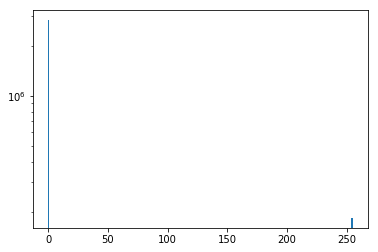

In [259]:
img = misc.imread("/Users/jjong/Downloads/human_outline.png")
img[img < 200] = 0
img[img >= 200 ] = 255

def imhist(img):
    fig, ax = plt.subplots()
    ax.set_yscale("log")
    ax.hist(img.astype(np.float32).reshape(img.size), bins=256)

imhist(img)
# cropped = img[38:970, 210:547]
cropped = img[22:990, 200:565]

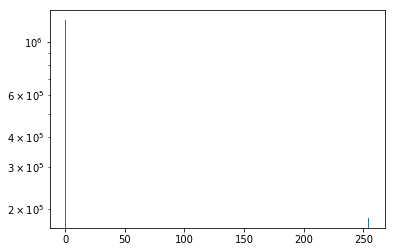

In [253]:
imhist(cropped)

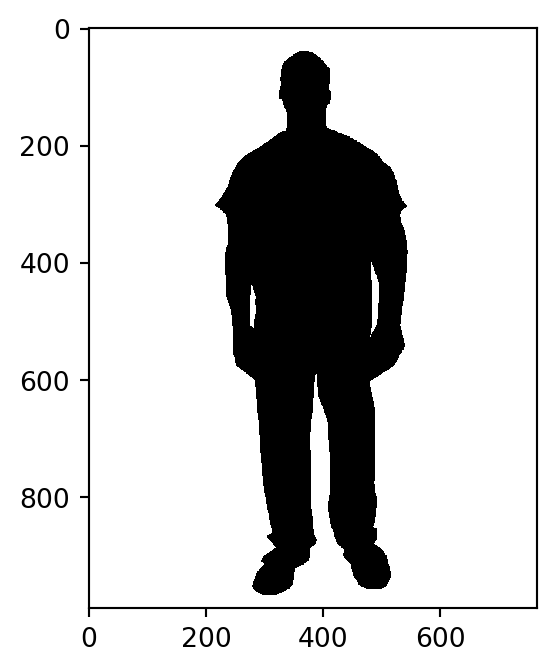

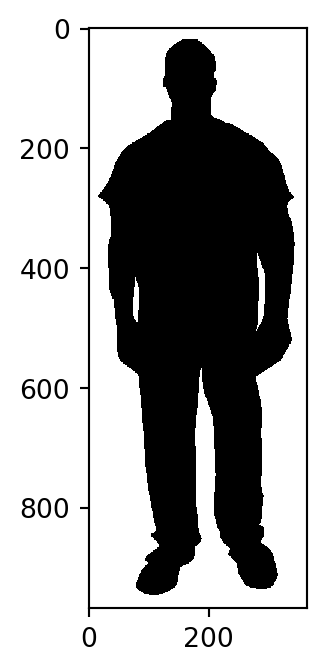

In [298]:
def imshow(img, contour_img=None, contour=False):
    fig, ax = plt.subplots()
    fig.dpi = 192
    cax = ax.imshow(img)
    if len(img.shape) == 2:
        fig.colorbar(cax)
    if contour:
        assert contour_img is not None
        img_wb = np.sum(contour_img, axis=-1)
        ax.contour(img_wb, levels=[contour], linewidths=0.8, linestyles="dashed", colors="#39dbd5")

imshow(img)
imshow(cropped)

/Users/jjong/anaconda3/envs/bruno/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


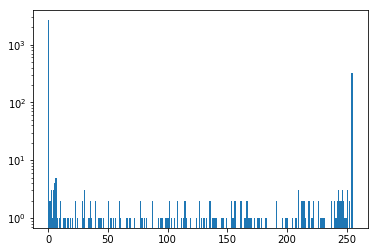

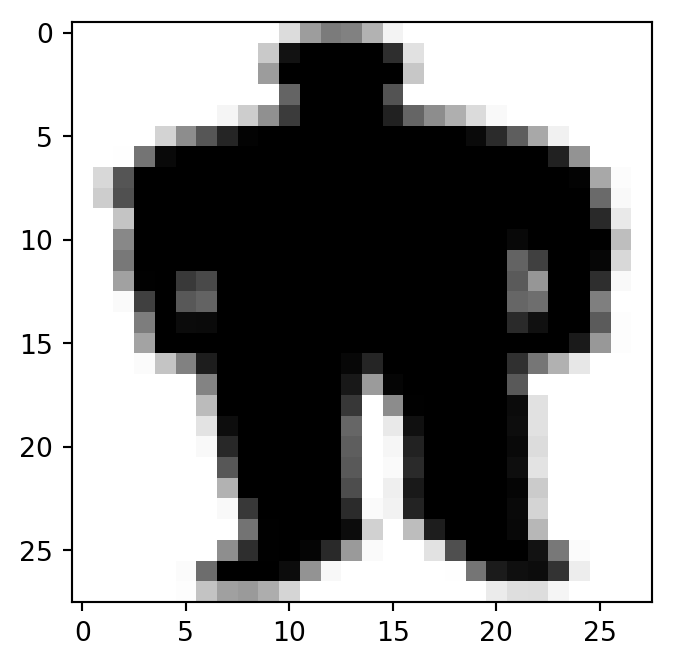

In [255]:
low_resol = misc.imresize(cropped, (28, 28), 'bicubic')
imhist(low_resol)
imshow(low_resol)

/Users/jjong/anaconda3/envs/bruno/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


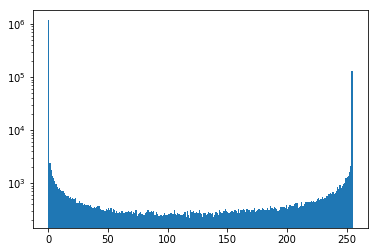

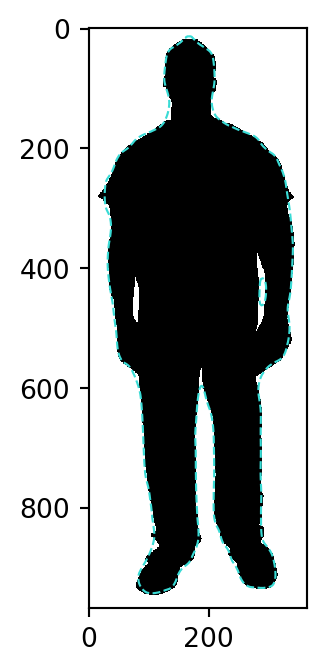

In [256]:
high_resol = misc.imresize(low_resol, cropped.shape[:2], 'bicubic')
imhist(high_resol)
imshow(cropped, contour_img=high_resol, contour=128)

/Users/jjong/anaconda3/envs/bruno/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/Users/jjong/anaconda3/envs/bruno/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


0.9677794698009609

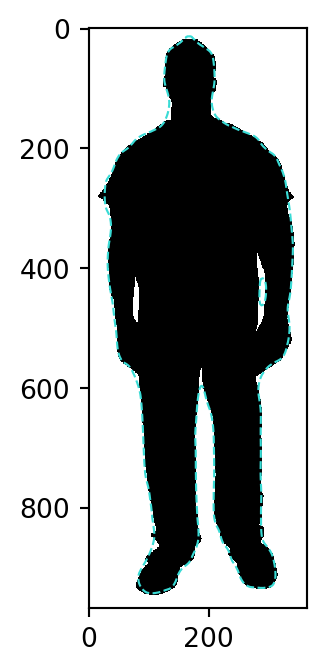

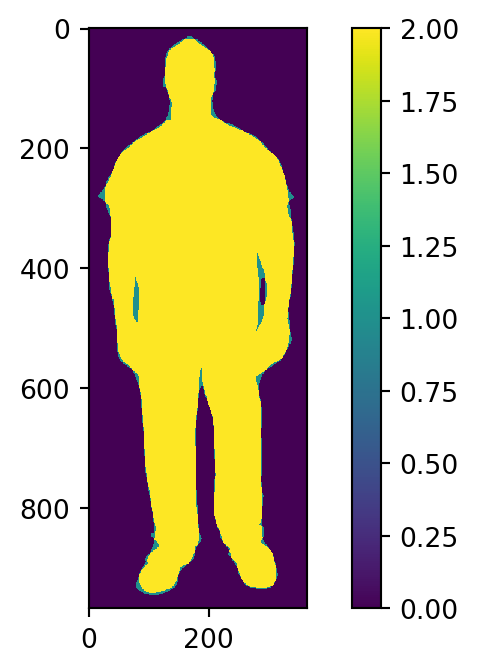

In [303]:
def downscale_and_upscale(img, bottleneck, noise=0.0):
    low_resol = misc.imresize(img, bottleneck, 'bicubic')
    if noise > 0.0:
        low_resol = add_noise(low_resol, ratio=noise)
    high_resol = misc.imresize(low_resol, img.shape[:2], 'bicubic')
    return low_resol, high_resol

def add_noise(img, ratio=0.05):
    noise = np.random.normal(scale=ratio, size=img.shape[:2])
    noise = np.expand_dims(noise, axis=2)
    img = img + (255 * noise)
    img[img < 0] = 0
    img[img > 255] = 255
    return img.astype(np.int)

def plot_bottoleneck_mask(img, low_resol=(28, 28), noise=0.0):
    _, high_resol_mask = downscale_and_upscale(img, bottleneck=low_resol, noise=noise)
    imshow(img, contour_img=high_resol_mask, contour=128)
    return high_resol_mask

def compute_iou(mask1, mask2):
    if len(mask1.shape) == 3:
        mask1 = mask1[:, :, -1]
    if len(mask2.shape) == 3:
        mask2 = mask2[:, :, -1]
    mask1 = (mask1 > 128).astype(np.int)
    mask2 = (mask2 > 128).astype(np.int)
    mask_sum = mask1 + mask2
    imshow(mask_sum)
    intersec = np.sum(mask_sum == 2)
    union = np.sum(mask_sum > 0)
    return intersec / union

mask = plot_bottoleneck_mask(cropped)
compute_iou(cropped, mask)